# 3 Prediction

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%load_ext autoreload
%autoreload 2

from a02_helper import *
from a02_functions import gd, predict, classify, optimize

import pandas as pd
from sklearn import metrics


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%matplotlib inline

In [7]:
# Fitted model
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

(3065, 57)
Epoch   0: f=  8661.469, eps=0.010000000
3065
Epoch   1: f=  4767.607, eps=0.010500000
3065
Epoch   2: f=  3573.970, eps=0.011025000
3065
Epoch   3: f=  2711.887, eps=0.011576250
3065
Epoch   4: f=  2069.651, eps=0.012155063
3065
Epoch   5: f=  1604.959, eps=0.012762816
3065
Epoch   6: f=  1362.409, eps=0.013400956
3065
Epoch   7: f=  1187.560, eps=0.014071004
3065
Epoch   8: f=  1076.212, eps=0.014774554
3065
Epoch   9: f=   991.532, eps=0.015513282
3065
Epoch  10: f=   962.508, eps=0.016288946
3065
Epoch  11: f=  1069.003, eps=0.008144473
3065
Epoch  12: f=   868.784, eps=0.008551697
3065
Epoch  13: f=   832.754, eps=0.008979282
3065
Epoch  14: f=   824.886, eps=0.009428246
3065
Epoch  15: f=   826.584, eps=0.004714123
3065
Epoch  16: f=   786.579, eps=0.004949829
3065
Epoch  17: f=   777.356, eps=0.005197320
3065
Epoch  18: f=   771.012, eps=0.005457186
3065
Epoch  19: f=   764.957, eps=0.005730046
3065
Epoch  20: f=   759.038, eps=0.006016548
3065
Epoch  21: f=   753.311

In `a02_functions.py`, complete the `predict` and `classify` methods for the predicted
spam probability and predicted class label, respectively. Use them to explore your
previously fitted model.

In [8]:
# Exploration example: confusion matrix
yhat = predict(Xtestz, wz_gd)
ypred = classify(Xtestz, wz_gd)
print(sklearn.metrics.confusion_matrix(ytest, ypred))  # true x predicted

[[887  54]
 [ 71 524]]


In [9]:
# Exploration example: classification report
print(sklearn.metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       941
           1       0.91      0.88      0.89       595

    accuracy                           0.92      1536
   macro avg       0.92      0.91      0.91      1536
weighted avg       0.92      0.92      0.92      1536



In [10]:
# Exploration Example: precision-recall curve (with annotated thresholds)
nextplot()
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision)
for x in np.linspace(0, 1, 10, endpoint=False):
    index = int(x * (precision.size - 1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
plt.xlabel("Recall")
plt.ylabel("Precision")

Text(0, 0.5, 'Precision')

In [11]:
# Explore which features are considered important
# YOUR CODE HERE

In [12]:
w = wz_gd.copy()  # already available in your notebook
k = 15  # how many top features to display

In [13]:
# ranking by absolute weight
idx_by_abs = np.argsort(np.abs(w))[::-1]
top_idx = idx_by_abs[:k]
top_feats = features[top_idx]
top_weights = w[top_idx]

print("Top {:d} features by absolute weight:".format(k))
for i, (fname, weight) in enumerate(zip(top_feats, top_weights), 1):
    sign = "pos" if weight > 0 else "neg"
    print(f"{i:2d}. {fname:30s} weight = {weight: .4f} ({sign})")

Top 15 features by absolute weight:
 1. word_freq_3d                   weight =  6.9292 (pos)
 2. capital_run_length_longest     weight =  2.3463 (pos)
 3. char_freq_$                    weight =  2.2042 (pos)
 4. word_freq_hp                   weight = -2.0603 (neg)
 5. word_freq_000                  weight =  1.4965 (pos)
 6. word_freq_george               weight = -1.3474 (neg)
 7. word_freq_remove               weight =  1.1600 (pos)
 8. char_freq_#                    weight =  1.1469 (pos)
 9. word_freq_edu                  weight = -1.0369 (neg)
10. word_freq_857                  weight =  0.8728 (pos)
11. word_freq_free                 weight =  0.8445 (pos)
12. word_freq_415                  weight = -0.8011 (neg)
13. word_freq_re                   weight = -0.7968 (neg)
14. word_freq_meeting              weight = -0.7558 (neg)
15. word_freq_font                 weight =  0.6721 (pos)


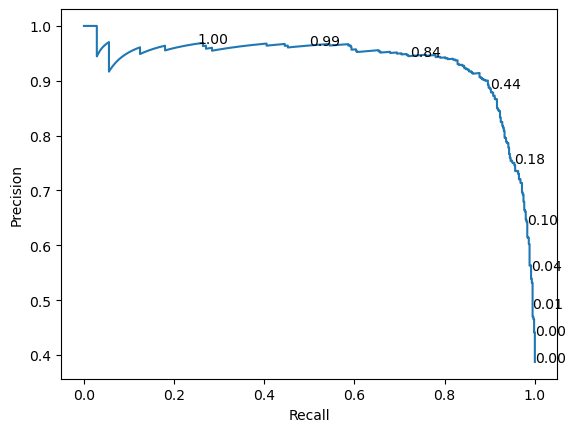

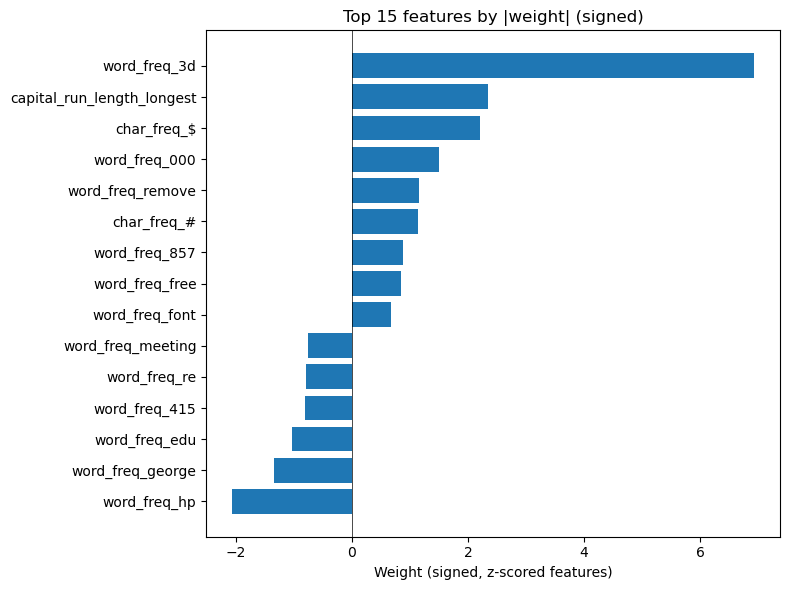

In [14]:
# bar plot of top features (signed)
plt.figure(figsize=(8, 6))
# plot sorted by weight (so negative at bottom, positive at top)
order = np.argsort(top_weights)
ypos = np.arange(len(top_weights))
plt.barh(ypos, top_weights[order], align='center')
plt.yticks(ypos, top_feats[order])
plt.xlabel("Weight (signed, z-scored features)")
plt.title(f"Top {k} features by |weight| (signed)")
plt.axvline(0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

In [15]:
# extra diagnostics: correlation with label and mean feature values by class
top_df = []
for j in top_idx:
    featname = features[j]
    wj = w[j]
    # correlation between feature and binary label (point-biserial = Pearson with binary)
    corr = np.corrcoef(Xz[:, j], y)[0, 1]
    mean_spam = Xz[y == 1, j].mean()
    mean_ham  = Xz[y == 0, j].mean()
    top_df.append((featname, wj, corr, mean_spam, mean_ham))

df_top = pd.DataFrame(top_df, columns=["feature", "weight", "corr_with_y", "mean_spam", "mean_ham"])
# sort by absolute weight for display
df_top["abs_weight"] = np.abs(df_top["weight"])
df_top = df_top.sort_values("abs_weight", ascending=False).drop(columns="abs_weight")
pd.set_option("display.float_format", "{: .4f}".format)
print("\nDiagnostics for top features (z-scored):")
display(df_top)


Diagnostics for top features (z-scored):


,feature,weight,corr_with_y,mean_spam,mean_ham
0,word_freq_3d,6.9292,0.0576,0.0709,-0.0468
1,capital_run_length_longest,2.3463,0.1928,0.2375,-0.1566
2,char_freq_$,2.2042,0.3271,0.4028,-0.2656
3,word_freq_hp,-2.0603,-0.2646,-0.3258,0.2149
4,word_freq_000,1.4965,0.3369,0.4149,-0.2736
5,word_freq_george,-1.3474,-0.1855,-0.2284,0.1506
6,word_freq_remove,1.1600,0.3421,0.4212,-0.2778
7,char_freq_#,1.1469,0.0658,0.0811,-0.0535
8,word_freq_edu,-1.0369,-0.1519,-0.1871,0.1234
9,word_freq_857,0.8728,-0.1206,-0.1485,0.0979


In [16]:
# interpretation helpers (short textual summary)
pos_feats = df_top[df_top.weight > 0].feature.tolist()
neg_feats = df_top[df_top.weight < 0].feature.tolist()
print("Features that increase spam probability (positive weights):", pos_feats[:8])
print("Features that decrease spam probability (negative weights):", neg_feats[:8])

Features that increase spam probability (positive weights): ['word_freq_3d', 'capital_run_length_longest', 'char_freq_$', 'word_freq_000', 'word_freq_remove', 'char_freq_#', 'word_freq_857', 'word_freq_free']
Features that decrease spam probability (negative weights): ['word_freq_hp', 'word_freq_george', 'word_freq_edu', 'word_freq_415', 'word_freq_re', 'word_freq_meeting']
